# 3 Exploratory Data Analysis<a id='3_Exploratory_Data_Analysis'></a>

## 3.1 Contents<a id='3.1_Contents'></a>
* [3 Exploratory data analysis](#3_Exploratory_Data_Analysis)
  * [3.1 Contents](#3.1_Contents)
  * [3.2 Introduction](#3.2_Introduction)
  * [3.3 Imports](#3.3_Imports)
  * [3.4 Load the data](#3.4_Load_The_Data)
    * [3.4.1 Admissions data](#3.4.1_Admissions_Data)
    * [3.4.2 Disease data](#3.4.2_Disease_Data)
    * [3.4.3 Labs data](#3.4.3_Lab_Data)
    * [3.4.4 Patients data](#3.4.2_Patients_Data)
    * [3.4.5 Prescriptions data](#3.4.5_Prescriptions_Data)
    * [3.4.6 The final dataframe](#3.4.6_Final_Dataframe)
  * [3.5 Explore the data](#3.5_Explore_The_Data)
    * [3.5.1 Explore the admissions data](#3.5.1_Explore_Admissions_Data)
      * [3.5.1.1 Total number of hospital visits per patient](#3.5.1.1_Total_number_of_visits_per_patient)
      * [3.5.1.2 Data by admissions type](#3.5.1.2_Data_by_admissions_type)
      * [3.5.1.3 Missing values in days to previous admission](#3.5.1.3_Missing_values_vays_previous_admission)
      
    * [3.5.2 Explore the disease data](#3.5.2_Explore_Disease_Data)
      * [3.5.2.1 Comparison of the diseases](#3.5.2.1_Comparison_of_the_diseases)
    * [3.5.3 Explore the labs data](#3.5.3_Explore_the_Labs_data)
      * [3.5.3.1 Tests' results](#3.5.3.1_Tests_Results)
      * [3.5.3.2 Top ten lab tests](#3.5.3.2_Top_ten_lab_tests)
      * [3.5.3.3 Total number of tests per patient](#3.5.3.3_Total_number_of_tests_per_patient)
    * [3.5.4 Explore the patients data](#3.5.4_Conclusion_On_How_To_Handle_State_Label)
        * [3.5.4.1 Age distribution by gender](#3.5.4.1_Age_distribution_by_gender)
        * [3.5.4.2 Most populated counties](#3.5.4.2_Most_populated_counties)
    * [3.5.5 Explore the prescriptions data](#3.5.5_Ski_Resort_Numeric_Data)
      * [3.5.5.1 Drug quantity rate updated](#3.5.5.1_Drug_quantity_rate_updated)
      * [3.5.5.2 Total number of medicines prescribed per patient](#3.5.5.2_Total_number_of_medicines_prescribed_per_patient)
      * [3.5.6 Explore the final dataframe](#3.5.6_Explore_Final_Dataframe)
      
  * [3.6 High dimensional data](#3.6_High_dimensional_data)
  


## 3.2 Introduction<a id='3.2_Introduction'></a>

This step is a critical process of performing initial examinations on our data as we discover patterns, point out anomalities and test hypotheses. We will use summary statistics and visual representations. 

The goal of this data science project is to come up with a model for predicting new diseases for 2020 using data from the 2018-2019 period. Specifically one needs to classify patients who will have one, both, or neither of diseases 'I10' and 'I739' in 2020 using data from 2018-2019. 


## 3.3 Imports<a id='3.3_Imports'></a>

In [79]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale
import os

from ipynb.fs.full.auxiliary_functions import save_file

#from library.sb_utils import save_file

## 3.4 Load The Data<a id='3.4_Load_The_Data'></a>

In [2]:
df1_res = pd.read_csv('../Outputs/df1_res.csv')
df1_subset=pd.read_csv('../Outputs/df1_subset.csv')

df2_res=pd.read_csv('../Outputs/df2_res.csv')
df2_subset=pd.read_csv('../Outputs/df2_subset.csv')

df3_res=pd.read_csv('../Outputs/df3_res.csv', low_memory=False)
df3_subset=pd.read_csv('../Outputs/df3_subset.csv')

df4_res=pd.read_csv('../Outputs/df4_res.csv')
df4_subset=pd.read_csv('../Outputs/df4_subset.csv')

df5_res=pd.read_csv('../Outputs/df5_res.csv')
df5_subset=pd.read_csv('../Outputs/df5_subset.csv')

df_final=pd.read_csv('../Outputs/df_final.csv')

### 3.4.1 Admissions Data<a id='3.4.1_Admissions_Data'></a>

In this section we will be using 'df1_res' and 'df1_subset' data, which were obtained from admissions data.

In [3]:
df1_res.head()

,member_id,num_of_visit,v1,v1_re_adm,v1_er_to_inp,v1_days_to_prev,v1_len,v1_len_pos,v1_ER,v1_INP,...,v24_len,v24_len_pos,v24_ER,v24_INP,v24_OUT,v24_OTH,v24_OBS,v24_SNF,v24_INP REHAB,v24_HOSPICE
0,ADD7uXD9TBOUjJD43H3tNw==,3,1,0,0,NaN,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0
1,AH8v69t8QBW1u2Iuh/5qlQ==,2,1,0,1,NaN,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0
2,AIEq/y06TGOCCjwkDzmaeA==,3,1,1,1,NaN,2,3,0,1,...,0,0,0,0,0,0,0,0,0,0
3,AInQlUfTRjSpklIOiuCifg==,1,1,0,0,NaN,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0
4,AK/yuahPR3Gx6dUrPtptzw==,8,1,0,0,NaN,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
df1_res.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1136 entries, 0 to 1135
Columns: 338 entries, member_id to v24_HOSPICE
dtypes: float64(14), int64(323), object(1)
memory usage: 2.9+ MB


In [5]:
df1_subset.head()

,member_id,admission_type,is_readmission,er_to_inp_admission_transfer,days_to_prev_admission,visit_duration,visit_duration_updated,nth_visit
0,ADD7uXD9TBOUjJD43H3tNw==,ER,No,N,NaN,0,1,1
1,ADD7uXD9TBOUjJD43H3tNw==,ER,No,N,45.0,0,1,2
2,ADD7uXD9TBOUjJD43H3tNw==,ER,No,N,47.0,0,1,3
3,AH8v69t8QBW1u2Iuh/5qlQ==,ER,No,Y,NaN,0,1,1
4,AH8v69t8QBW1u2Iuh/5qlQ==,INP,Yes,Y,NaN,0,1,2


In [6]:
df1_subset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3634 entries, 0 to 3633
Data columns (total 8 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   member_id                     3634 non-null   object 
 1   admission_type                3634 non-null   object 
 2   is_readmission                3634 non-null   object 
 3   er_to_inp_admission_transfer  3634 non-null   object 
 4   days_to_prev_admission        1738 non-null   float64
 5   visit_duration                3634 non-null   int64  
 6   visit_duration_updated        3634 non-null   int64  
 7   nth_visit                     3634 non-null   int64  
dtypes: float64(1), int64(3), object(4)
memory usage: 227.2+ KB


### 3.4.2 Disease Data<a id='3.4.2_Disease_Data'></a>

We will consider both 'df2_res' and 'df2_subset' data, which were derived from disease data.

In [7]:
df2_res.head()

,member_id,icd_I10,icd_I10_chronic,icd_I739,icd_I739_chronic,icd_neither,icd_neither_chronic
0,nr+43zfHQPKSwx2IJuJI5Q==,1,0,0,0,0,0
1,Vwf7mI0tTGC4amYJPD6uJg==,0,0,1,1,0,0
2,TRudRczSQt6dwb6EeZ1RLA==,0,0,1,1,0,0
3,VjG87+cBSB2B1+loMmoHCg==,0,0,1,1,0,0
4,7CfP6Hq5Qy6J0rXIuTc7kw==,1,0,0,0,0,0


In [8]:
df2_res.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2841 entries, 0 to 2840
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   member_id            2841 non-null   object
 1   icd_I10              2841 non-null   int64 
 2   icd_I10_chronic      2841 non-null   int64 
 3   icd_I739             2841 non-null   int64 
 4   icd_I739_chronic     2841 non-null   int64 
 5   icd_neither          2841 non-null   int64 
 6   icd_neither_chronic  2841 non-null   int64 
dtypes: int64(6), object(1)
memory usage: 155.5+ KB


In [9]:
df2_subset.head()

,member_id,icd_code,icd_chronic_or_acute
0,nr+43zfHQPKSwx2IJuJI5Q==,I10,Unknown
1,Vwf7mI0tTGC4amYJPD6uJg==,I739,Chronic
2,TRudRczSQt6dwb6EeZ1RLA==,I739,Chronic
3,VjG87+cBSB2B1+loMmoHCg==,I739,Chronic
4,7CfP6Hq5Qy6J0rXIuTc7kw==,I10,Unknown


In [10]:
df2_subset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2999 entries, 0 to 2998
Data columns (total 3 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   member_id             2999 non-null   object
 1   icd_code              2999 non-null   object
 2   icd_chronic_or_acute  2999 non-null   object
dtypes: object(3)
memory usage: 70.4+ KB


### 3.4.3 Labs Data<a id='3.4.3_Labs_Data'></a>

We will be considering 'df3_res' and 'df3_subset' data, which were collected from labs data.

In [11]:
df3_res.head()

,member_id,lab_4548-4,lab_4548-4_res,lab_2161-8,lab_2161-8_res,lab_742-7,lab_742-7_res,lab_777-3,lab_777-3_res,lab_2028-9,...,lab_6821-3,lab_6821-3_res,lab_6152-3,lab_6152-3_res,lab_47365-2,lab_47365-2_res,lab_32769-2,lab_32769-2_res,lab_74678-4,lab_74678-4_res
0,OEcf/fmaTq+aPoYfknZK3A==,1,3.0,1,2.0,1,2.0,1,3.0,1,...,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0
1,OHAaSbjjQquqw750i32wuA==,1,2.0,0,0.0,1,2.0,1,2.0,1,...,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0
2,OIW4s4BKSo+YALd/7/FNlw==,1,3.0,1,2.0,1,2.0,1,2.0,1,...,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0
3,OKbldt8uTDOJhCtD5OrD7A==,1,3.0,0,0.0,1,2.0,1,2.0,1,...,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0
4,OLXnSA0JSzGQhBaRRowhQw==,1,2.0,0,0.0,1,2.0,1,2.0,1,...,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0


In [12]:
df3_res.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Columns: 3319 entries, member_id to lab_74678-4_res
dtypes: float64(1457), int64(1861), object(1)
memory usage: 58.0+ MB


In [13]:
df3_subset.head()

,member_id,loinc_code,abnormal_code_updated
0,OEcf/fmaTq+aPoYfknZK3A==,4548-4,H
1,OEcf/fmaTq+aPoYfknZK3A==,2161-8,NORM
2,OEcf/fmaTq+aPoYfknZK3A==,742-7,NORM
3,OEcf/fmaTq+aPoYfknZK3A==,777-3,H
4,OEcf/fmaTq+aPoYfknZK3A==,2028-9,NORM


In [14]:
df3_subset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 620077 entries, 0 to 620076
Data columns (total 3 columns):
 #   Column                 Non-Null Count   Dtype 
---  ------                 --------------   ----- 
 0   member_id              620077 non-null  object
 1   loinc_code             620077 non-null  object
 2   abnormal_code_updated  432566 non-null  object
dtypes: object(3)
memory usage: 14.2+ MB


### 3.4.4 Patients Data<a id='3.4.4_Patients_Data'></a>

Both 'df4_res' and 'df4_subset' data will be analyzed, which were captured from patients data.

In [15]:
df4_res.head()

,member_id,age,sex_F,sex_M,dual_status_1,dual_status_2,dual_status_3,dual_status_4,dual_status_5,dual_status_6,...,city_9,city_90,city_91,city_92,city_93,city_95,city_96,city_97,city_98,city_99
0,AAHLhKW7RYOEQIemWrh/1w==,72,0,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,ADD7uXD9TBOUjJD43H3tNw==,46,1,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,AH8v69t8QBW1u2Iuh/5qlQ==,43,0,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,AIEq/y06TGOCCjwkDzmaeA==,89,0,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,AIfxyYzERH6jOgV6KZqn+g==,76,1,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [16]:
df4_res.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2444 entries, 0 to 2443
Columns: 266 entries, member_id to city_99
dtypes: int64(265), object(1)
memory usage: 5.0+ MB


In [17]:
df4_subset.head()

,member_id,age,sex,dual_status,insurance_company,insurance_type,pbp_type,county,city
0,AAHLhKW7RYOEQIemWrh/1w==,72,M,1,1,1,1,1,1
1,ADD7uXD9TBOUjJD43H3tNw==,46,F,2,2,1,3,2,2
2,AH8v69t8QBW1u2Iuh/5qlQ==,43,M,2,5,1,1,9,20
3,AIEq/y06TGOCCjwkDzmaeA==,89,M,2,2,1,2,15,35
4,AIfxyYzERH6jOgV6KZqn+g==,76,F,2,2,1,2,2,2


### 3.4.5 Prescriptions Data<a id='3.4.5_Prescriptions_Data'></a>

We will be examining 'df5_res' and 'df5_subset' data, which were acquired from prescriptions data.

In [18]:
df5_res.head()

,member_id,ndc#_60505013400,ndc#_60505013400_rate,ncd#_60505013400_refill,ndc#_62175013643,ndc#_62175013643_rate,ncd#_62175013643_refill,ndc#_50742013510,ndc#_50742013510_rate,ncd#_50742013510_refill,...,ndc#_228300311_refill,ndc#_172392760_refill,ndc#_59746038410_refill,ndc#_68382013710_refill,ndc#_16252060102_refill,ndc#_10135018210_refill,ndc#_832102510_refill,ndc#_71093012105_refill,ndc#_43598075360_refill,ndc#_64380086106_refill
0,AAHLhKW7RYOEQIemWrh/1w==,1,1.0,0,1,1.0,0,1,1.0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,ADD7uXD9TBOUjJD43H3tNw==,0,0.0,0,0,0.0,0,0,0.0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,AH8v69t8QBW1u2Iuh/5qlQ==,0,0.0,0,0,0.0,0,0,0.0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,AIEq/y06TGOCCjwkDzmaeA==,0,0.0,0,0,0.0,0,0,0.0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,AIfxyYzERH6jOgV6KZqn+g==,0,0.0,0,0,0.0,0,0,0.0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [19]:
df5_res.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2410 entries, 0 to 2409
Columns: 26503 entries, member_id to ndc#_64380086106_refill
dtypes: float64(9220), int64(17282), object(1)
memory usage: 487.3+ MB


In [20]:
df5_subset.head()

,member_id,ndc_number,new_or_refill,drug_quantity_rate
0,AAHLhKW7RYOEQIemWrh/1w==,60505013400,N,1.0
1,AAHLhKW7RYOEQIemWrh/1w==,62175013643,N,1.0
2,AAHLhKW7RYOEQIemWrh/1w==,50742013510,N,1.0
3,AAHLhKW7RYOEQIemWrh/1w==,60505267108,N,1.0
4,AAHLhKW7RYOEQIemWrh/1w==,43547039910,N,1.0


In [21]:
df5_subset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 179827 entries, 0 to 179826
Data columns (total 4 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   member_id           179827 non-null  object 
 1   ndc_number          179423 non-null  object 
 2   new_or_refill       139794 non-null  object 
 3   drug_quantity_rate  168040 non-null  float64
dtypes: float64(1), object(3)
memory usage: 5.5+ MB


### 3.4.6 The Final Dataframe<a id='3.4.6_Final_Dataframe'></a>

In [22]:
df_final.head()

,member_id,icd_I10,icd_I10_chronic,icd_I739,icd_I739_chronic,icd_neither,icd_neither_chronic,num_of_visit,v1,v1_re_adm,...,ndc#_228300311_refill,ndc#_172392760_refill,ndc#_59746038410_refill,ndc#_68382013710_refill,ndc#_16252060102_refill,ndc#_10135018210_refill,ndc#_832102510_refill,ndc#_71093012105_refill,ndc#_43598075360_refill,ndc#_64380086106_refill
0,nr+43zfHQPKSwx2IJuJI5Q==,1,0,0,0,0,0,1.0,1.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Vwf7mI0tTGC4amYJPD6uJg==,0,0,1,1,0,0,1.0,1.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,TRudRczSQt6dwb6EeZ1RLA==,0,0,1,1,0,0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,VjG87+cBSB2B1+loMmoHCg==,0,0,1,1,0,0,2.0,1.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,7CfP6Hq5Qy6J0rXIuTc7kw==,1,0,0,0,0,0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [23]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2841 entries, 0 to 2840
Columns: 30429 entries, member_id to ndc#_64380086106_refill
dtypes: float64(30422), int64(6), object(1)
memory usage: 659.6+ MB


## 3.5 Explore The Data<a id='3.5_Explore_The_Data'></a>

## 3.5.1 Explore The Admissions Data<a id='3.5.1_Explore_Admissions_Data'></a>

### 3.5.1.1 Total number of hospital visits per patient<a id='3.5.1.1_Total_number_of_visits_per_patient'></a>

In [24]:
df1_res.head()

,member_id,num_of_visit,v1,v1_re_adm,v1_er_to_inp,v1_days_to_prev,v1_len,v1_len_pos,v1_ER,v1_INP,...,v24_len,v24_len_pos,v24_ER,v24_INP,v24_OUT,v24_OTH,v24_OBS,v24_SNF,v24_INP REHAB,v24_HOSPICE
0,ADD7uXD9TBOUjJD43H3tNw==,3,1,0,0,NaN,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0
1,AH8v69t8QBW1u2Iuh/5qlQ==,2,1,0,1,NaN,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0
2,AIEq/y06TGOCCjwkDzmaeA==,3,1,1,1,NaN,2,3,0,1,...,0,0,0,0,0,0,0,0,0,0
3,AInQlUfTRjSpklIOiuCifg==,1,1,0,0,NaN,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0
4,AK/yuahPR3Gx6dUrPtptzw==,8,1,0,0,NaN,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


We consider `num_of_visit` column first. The cell below shows that the patients visited the hospital on average 3 times over the period. Also the histogram of the column indicates that the number of hospital visits has positively skewed distribution. More than 400 patients visited the hospital at least once and, at most, 3 times. 

In [25]:
df1_res['num_of_visit'].describe()

count    1136.000000
mean        3.198944
std         2.950254
min         1.000000
25%         1.000000
50%         2.000000
75%         4.000000
max        24.000000
Name: num_of_visit, dtype: float64

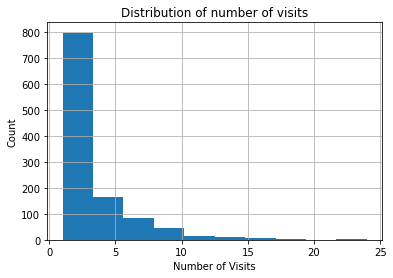

In [26]:
df1_res['num_of_visit'].hist()
plt.xlabel('Number of Visits')
plt.ylabel('Count')
plt.title('Distribution of number of visits');

### 3.5.1.2 Data by admissions type<a id='3.5.1.2_Data_by_admissions_type'></a>

In [27]:
df1_subset.head()

,member_id,admission_type,is_readmission,er_to_inp_admission_transfer,days_to_prev_admission,visit_duration,visit_duration_updated,nth_visit
0,ADD7uXD9TBOUjJD43H3tNw==,ER,No,N,NaN,0,1,1
1,ADD7uXD9TBOUjJD43H3tNw==,ER,No,N,45.0,0,1,2
2,ADD7uXD9TBOUjJD43H3tNw==,ER,No,N,47.0,0,1,3
3,AH8v69t8QBW1u2Iuh/5qlQ==,ER,No,Y,NaN,0,1,1
4,AH8v69t8QBW1u2Iuh/5qlQ==,INP,Yes,Y,NaN,0,1,2


The horizontal bar plot below shows that ER and INP are the admissions types that appear the most. Both types shows around 800 times. OTH, which shows around 300 times, is the admission type that follows next. 

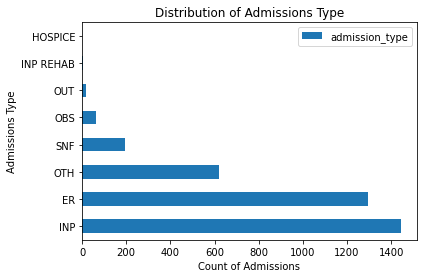

In [28]:
df1_subset['admission_type'].value_counts().to_frame().plot.barh()
plt.xlabel('Count of Admissions')
plt.ylabel('Admissions Type')
plt.title('Distribution of Admissions Type');

In [29]:
df1_subset['admission_type'].value_counts()

INP          1444
ER           1295
OTH           618
SNF           193
OBS            61
OUT            20
INP REHAB       2
HOSPICE         1
Name: admission_type, dtype: int64

We also observe that 3 out of 4 admissions are not readmissions. This means that for most patients there is at least a month between two consequent hospital visits. See below.   

In [30]:
df1_subset['is_readmission'].value_counts()

No     2626
Yes    1008
Name: is_readmission, dtype: int64

The next cell implies that approximately 25% of ER visits are readmissions. On the other hand, around 40% of INP admissions are readmissions. These indicate that the portion of hospital visits which are made by the same group of patients is significant. 

In [31]:
df1_subset.groupby('admission_type')['is_readmission'].value_counts().to_frame()


is_readmission
admission_type is_readmission                
ER             No                         964
               Yes                        331
HOSPICE        Yes                          1
INP            No                         875
               Yes                        569
INP REHAB      Yes                          2
OBS            No                          54
               Yes                          7
OTH            No                         582
               Yes                         36
OUT            No                          19
               Yes                          1
SNF            No                         132
               Yes                         61

258 out of 805 of emergency admissions (ER type) transfered to inpatient service (INP type) . Additionally, 158 out of 844 inpatient admissions made right after an emergency admissions. See below for details.

In [32]:
df1_subset.groupby('admission_type')['er_to_inp_admission_transfer'].value_counts().to_frame()


er_to_inp_admission_transfer
admission_type er_to_inp_admission_transfer                              
ER             N                                                      872
               Y                                                      423
HOSPICE        N                                                        1
INP            N                                                     1186
               Y                                                      258
INP REHAB      N                                                        2
OBS            N                                                       61
OTH            N                                                      618
OUT            N                                                       20
SNF            N                                                      193

In [33]:
df1_subset.groupby('admission_type')['visit_duration'].max().to_frame()

,visit_duration
admission_type,
ER,42
HOSPICE,0
INP,113
INP REHAB,3
OBS,2
OTH,66
OUT,0
SNF,66


More statistics on the admissions type is below.

In [34]:
adm_type_means = df1_subset.groupby('admission_type')[['visit_duration', 'days_to_prev_admission']].mean()
adm_type_means.head()

,visit_duration,days_to_prev_admission
admission_type,,
ER,1.799228,78.077876
HOSPICE,0.000000,NaN
INP,4.283934,198.918121
INP REHAB,1.500000,NaN
OBS,0.131148,321.461538


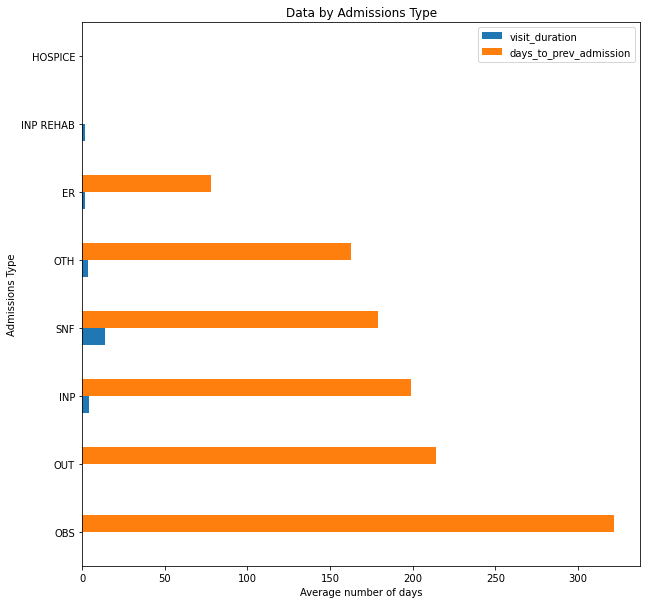

In [35]:
(adm_type_means.reindex(index=adm_type_means.mean(axis=1)
    .sort_values(ascending=False)
    .index)
    .plot(kind='barh', figsize=(10, 10), title='Data by Admissions Type'))
plt.xlabel('Average number of days')
plt.ylabel('Admissions Type');

Below we observed that more than half of values in `days_to_prev_admission` are null.

### 3.5.1.3 Missing values in days to previous admission<a id='3.5.1.3_Missing_values_days_previous_admission'></a>

In [36]:
missing_DaysToPrevAdmission=pd.DataFrame({'null_count': df1_subset['days_to_prev_admission'].isnull().sum(), 'null_percent': 100*df1_subset['days_to_prev_admission'].isnull().mean()}, index=[0])
missing_DaysToPrevAdmission

,null_count,null_percent
0,1896,52.173913


## 3.5.2 Explore the Disease Data<a id='3.5.2_Explore_Disease_Data'></a>

In [37]:
df2_subset

,member_id,icd_code,icd_chronic_or_acute
0,nr+43zfHQPKSwx2IJuJI5Q==,I10,Unknown
1,Vwf7mI0tTGC4amYJPD6uJg==,I739,Chronic
2,TRudRczSQt6dwb6EeZ1RLA==,I739,Chronic
3,VjG87+cBSB2B1+loMmoHCg==,I739,Chronic
4,7CfP6Hq5Qy6J0rXIuTc7kw==,I10,Unknown
...,...,...,...
2994,rlUlZUMgRTim7Mkdf1yaPg==,neither,Chronic
2995,KY3kRZ3uQcqW6+7kl4PbWw==,neither,Chronic
2996,71rJt0vGQTaGp1yQ9jBB/g==,neither,Unknown
2997,lzOoZy24Qc2CxCC1i1wsEA==,neither,Unknown


### 3.5.2.1 Comparison of the diseases<a id='3.5.2.1_Comparison_of_the_diseases'></a>

We compare the rate of the diseases below. 

In [38]:
disease_rate=pd.DataFrame({'disease': ['I10', 'I739'], 'disease_percent':[100*df2_subset['icd_code'].value_counts()[0]/(df2_subset['icd_code'].value_counts().sum()), 100*df2_subset['icd_code'].value_counts()[1]/(df2_subset['icd_code'].value_counts().sum())]})
disease_rate

,disease,disease_percent
0,I10,41.080360
1,I739,33.344448


All values for `icd_chronic_or_acute` are 'Unknown' for the patients with disease 'I10'. However, those values are all 'Chronic' for the patients with disease 'I739', see below.

In [39]:
df2_subset.groupby('icd_code')['icd_chronic_or_acute'].value_counts().to_frame()

icd_chronic_or_acute
icd_code icd_chronic_or_acute                      
I10      Unknown                               1232
I739     Chronic                                767
neither  Unknown                                682
         Chronic                                318

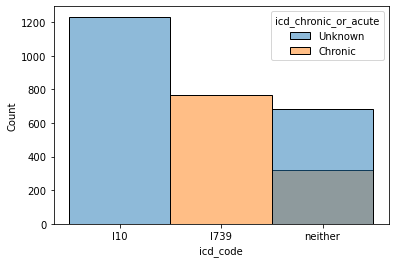

In [40]:
ax = sns.histplot(x="icd_code", hue="icd_chronic_or_acute", data=df2_subset)

## 3.5.3 Explore the Labs Data<a id='3.5.3_Explore_Labs_Data'></a>

In [41]:
df3_res.head()

,member_id,lab_4548-4,lab_4548-4_res,lab_2161-8,lab_2161-8_res,lab_742-7,lab_742-7_res,lab_777-3,lab_777-3_res,lab_2028-9,...,lab_6821-3,lab_6821-3_res,lab_6152-3,lab_6152-3_res,lab_47365-2,lab_47365-2_res,lab_32769-2,lab_32769-2_res,lab_74678-4,lab_74678-4_res
0,OEcf/fmaTq+aPoYfknZK3A==,1,3.0,1,2.0,1,2.0,1,3.0,1,...,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0
1,OHAaSbjjQquqw750i32wuA==,1,2.0,0,0.0,1,2.0,1,2.0,1,...,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0
2,OIW4s4BKSo+YALd/7/FNlw==,1,3.0,1,2.0,1,2.0,1,2.0,1,...,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0
3,OKbldt8uTDOJhCtD5OrD7A==,1,3.0,0,0.0,1,2.0,1,2.0,1,...,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0
4,OLXnSA0JSzGQhBaRRowhQw==,1,2.0,0,0.0,1,2.0,1,2.0,1,...,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0


In [42]:
df3_subset.head()

,member_id,loinc_code,abnormal_code_updated
0,OEcf/fmaTq+aPoYfknZK3A==,4548-4,H
1,OEcf/fmaTq+aPoYfknZK3A==,2161-8,NORM
2,OEcf/fmaTq+aPoYfknZK3A==,742-7,NORM
3,OEcf/fmaTq+aPoYfknZK3A==,777-3,H
4,OEcf/fmaTq+aPoYfknZK3A==,2028-9,NORM


### 3.5.3.1 Tests' Results<a id='3.5.3.1_Tests_Results'></a>

In [43]:
df3_subset['abnormal_code_updated'].value_counts()

NORM      349656
H          47405
L          29015
ABNORM      6490
Name: abnormal_code_updated, dtype: int64

### 3.5.3.2 Top ten lab tests<a id='3.5.3.2_Top_ten_lab_tests'></a>

The value counts shows that tests can be divided into groups. Each group contained tests that were administered approximately the same number of times. This might be that some tests are typically interpreted along with results from other tests done at the same time. For instance, lab tests '2075-0' examined  chloride levels in the blood and it is almost always done with test '2951-2', which measures sodium levels in the blood. This may explain why we have almost the same number for each of these two tests. We examined the top ten lab tests administered. 

In [44]:
top_tests=df3_subset['loinc_code'].value_counts().sort_values(ascending=False)[:10]
top_tests

17861-6    12690
2160-0     12402
2345-7     12269
2823-3     12235
3094-0     12229
2075-0     12229
2951-2     12225
2028-9     12196
3097-3     11893
1751-7     11305
Name: loinc_code, dtype: int64

In [45]:
top_tests_df = df3_subset[df3_subset['loinc_code'].isin(top_tests.index)]
top_tests_df.head()                            

,member_id,loinc_code,abnormal_code_updated
4,OEcf/fmaTq+aPoYfknZK3A==,2028-9,NORM
14,OEcf/fmaTq+aPoYfknZK3A==,3094-0,NORM
23,OEcf/fmaTq+aPoYfknZK3A==,1751-7,L
24,OEcf/fmaTq+aPoYfknZK3A==,3097-3,NaN
25,OEcf/fmaTq+aPoYfknZK3A==,2160-0,NORM


In [46]:
 top_tests_df.groupby('loinc_code')['abnormal_code_updated'].value_counts()

loinc_code  abnormal_code_updated
1751-7      NORM                     10639
            L                          446
            H                           44
17861-6     NORM                     11908
            H                          314
            L                          259
2028-9      NORM                     11373
            H                          343
            L                          284
2075-0      NORM                     11230
            L                          603
            H                          212
2160-0      NORM                      7116
            H                         4849
            L                          293
2345-7      H                         6541
            NORM                      4439
            L                           66
2823-3      NORM                     11509
            H                          354
            L                          165
2951-2      NORM                     11325
            L       

It is worth noting that the top ten lab tests done have no results labelled as 'ABNORM'. However, they have some results labelled as 'L' and 'H'. Also the lab test '2345-7' has a significant number of 'H' results. This test indicates the level of glucose in blood. A high level of blood glucose may imply that the patient is a Type 1 diabetic.   

Text(0.5, 1.0, 'Top Ten Lab Results')

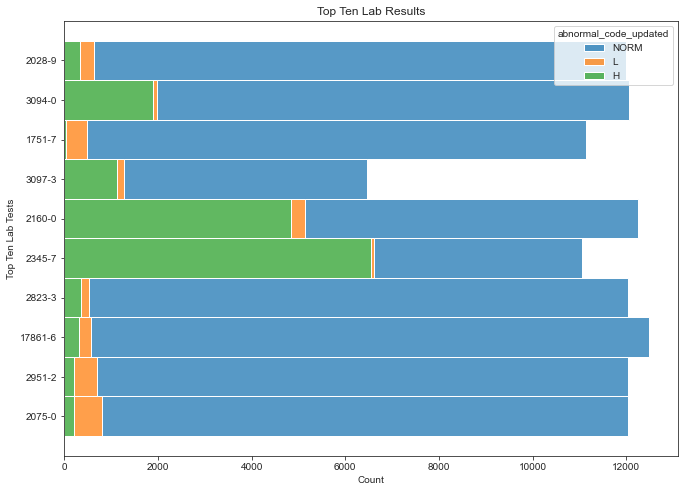

In [47]:
sns.set_style('ticks')
fig, ax = plt.subplots()
fig.set_size_inches(11.0, 8.0)
ax = sns.histplot(y="loinc_code", hue="abnormal_code_updated", data=top_tests_df, multiple='stack')
plt.xlabel('Count')
plt.ylabel('Top Ten Lab Tests')
plt.title('Top Ten Lab Results')

### 3.5.3.3 Total number of tests per patient<a id='3.5.3.3_Total_number_of_tests_per_patient'></a>

Lastly we will find the total number of lab tests done for each patient to add this info to the final dataframe.  

In [48]:
df3_num_tests=df3_subset[['member_id', 'loinc_code']]
df3_num_tests.head()

,member_id,loinc_code
0,OEcf/fmaTq+aPoYfknZK3A==,4548-4
1,OEcf/fmaTq+aPoYfknZK3A==,2161-8
2,OEcf/fmaTq+aPoYfknZK3A==,742-7
3,OEcf/fmaTq+aPoYfknZK3A==,777-3
4,OEcf/fmaTq+aPoYfknZK3A==,2028-9


In [49]:
total_num_tests_per_patient=df3_num_tests.groupby('member_id')['loinc_code'].count().to_frame()
total_num_tests_per_patient.rename({'loinc_code': 'num_of_tests'}, axis=1, inplace=True)
total_num_tests_per_patient.head()

,num_of_tests
member_id,
++ykE1ScTO25Rg6Kq3PmLA==,268
+2eRp8JYSsq4o+wBvwpMRw==,97
+4IQ84nOSlCUk9Qyk7Ti9A==,338
+5hDCZZYSza/PDrobnQfWQ==,79
+6HrED1vTpmHl96guT5Qhg==,183


## 3.5.4 Explore The Patients Data<a id='3.5.4_Explore_Patients_Data'></a>

In [50]:
df4_res.head()

,member_id,age,sex_F,sex_M,dual_status_1,dual_status_2,dual_status_3,dual_status_4,dual_status_5,dual_status_6,...,city_9,city_90,city_91,city_92,city_93,city_95,city_96,city_97,city_98,city_99
0,AAHLhKW7RYOEQIemWrh/1w==,72,0,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,ADD7uXD9TBOUjJD43H3tNw==,46,1,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,AH8v69t8QBW1u2Iuh/5qlQ==,43,0,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,AIEq/y06TGOCCjwkDzmaeA==,89,0,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,AIfxyYzERH6jOgV6KZqn+g==,76,1,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [51]:
df4_res.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2444 entries, 0 to 2443
Columns: 266 entries, member_id to city_99
dtypes: int64(265), object(1)
memory usage: 5.0+ MB


In [52]:
df4_subset.head(3)

,member_id,age,sex,dual_status,insurance_company,insurance_type,pbp_type,county,city
0,AAHLhKW7RYOEQIemWrh/1w==,72,M,1,1,1,1,1,1
1,ADD7uXD9TBOUjJD43H3tNw==,46,F,2,2,1,3,2,2
2,AH8v69t8QBW1u2Iuh/5qlQ==,43,M,2,5,1,1,9,20


### 3.5.4.1 Age distribution by gender<a id='3.5.4.1_Age_distribution_by_gender'></a>

First we will drop `sex_F` since column `sex_M` is enough to encode the gender of the patients.

In [53]:
df4_res.drop(columns=['sex_F'], axis=1, inplace=True)
df4_res.head() # check the update

,member_id,age,sex_M,dual_status_1,dual_status_2,dual_status_3,dual_status_4,dual_status_5,dual_status_6,dual_status_7,...,city_9,city_90,city_91,city_92,city_93,city_95,city_96,city_97,city_98,city_99
0,AAHLhKW7RYOEQIemWrh/1w==,72,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,ADD7uXD9TBOUjJD43H3tNw==,46,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,AH8v69t8QBW1u2Iuh/5qlQ==,43,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,AIEq/y06TGOCCjwkDzmaeA==,89,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,AIfxyYzERH6jOgV6KZqn+g==,76,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [54]:
df4_res['sex_M'].value_counts()

0    1246
1    1198
Name: sex_M, dtype: int64

In the following cell we see that the distribution of age by gender is similar to a normal distribution for both gender.

Text(0.5, 1.0, 'Age distribution by gender')

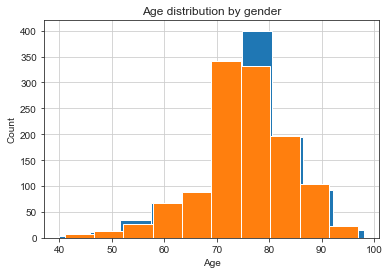

In [55]:
df4_res.groupby('sex_M')['age'].hist()
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Age distribution by gender')

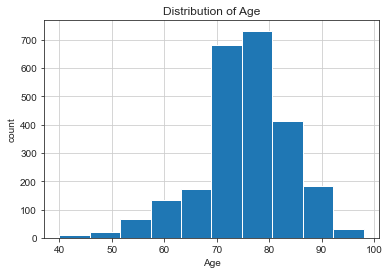

In [56]:
df4_res['age'].hist()
plt.xlabel('Age')
plt.ylabel('count')
plt.title('Distribution of Age');

We can verify that the mean of the female patients' age is almost identical with the mean of the male patients' age.

In [57]:
df4_res.groupby('sex_M')['age'].mean()

sex_M
0    75.108347
1    75.205342
Name: age, dtype: float64

Text(0.5, 0, 'Male vs Female')

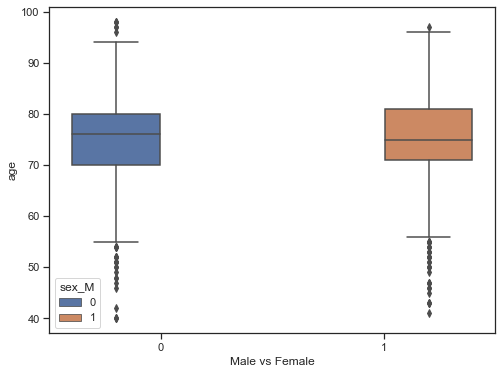

In [58]:
sns.set(style="ticks", color_codes=True)
fig, ax = plt.subplots()
fig.set_size_inches(8.0, 6.0)
ax = sns.boxplot(x=df4_res['sex_M'], y=df4_res['age'], hue=df4_res['sex_M'])
plt.xlabel('Male vs Female')

Text(0.5, 1.0, 'Age distribution ')

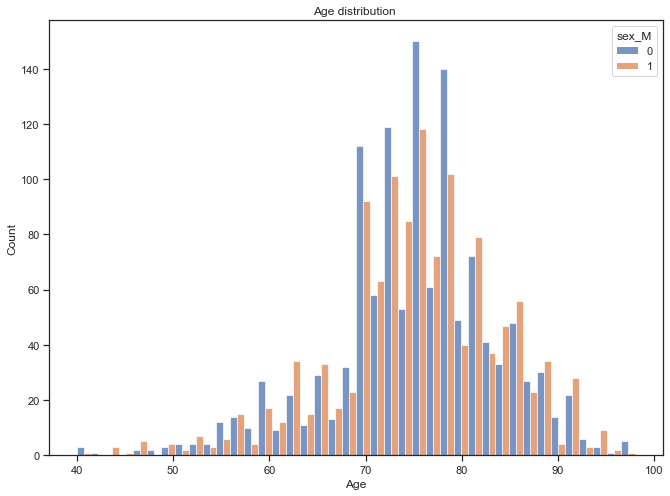

In [59]:
sns.set_style('ticks')
fig, ax = plt.subplots()
fig.set_size_inches(11.0, 8.0)
ax = sns.histplot(x="age", hue="sex_M", data=df4_res, multiple='dodge')
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Age distribution ')

### 3.5.4.2 Most populated Counties<a id='3.5.4.2_Most_populated_counties'></a>

The below cell shows that the most populated county is the one labelled as 2. Almost 40% of the patients lives in this county. 

In [60]:
population_by_county=df4_subset['county'].value_counts().to_frame()
population_by_county.rename(columns={'county': 'count'}, inplace=True)
num_counties=population_by_county['count'].sum()
population_by_county['percent']=population_by_county['count']/num_counties
population_by_county.head()

,count,percent
2,969,0.396481
7,255,0.104337
3,138,0.056465
8,114,0.046645
4,103,0.042144


## 3.5.5 Explore The Prescriptions Data<a id='3.5.5_Explore_Prescriptions_Data'></a>

In [61]:
df5_subset.head()

,member_id,ndc_number,new_or_refill,drug_quantity_rate
0,AAHLhKW7RYOEQIemWrh/1w==,60505013400,N,1.0
1,AAHLhKW7RYOEQIemWrh/1w==,62175013643,N,1.0
2,AAHLhKW7RYOEQIemWrh/1w==,50742013510,N,1.0
3,AAHLhKW7RYOEQIemWrh/1w==,60505267108,N,1.0
4,AAHLhKW7RYOEQIemWrh/1w==,43547039910,N,1.0


### 3.5.5.1 Drug quantity rate updated <a id='3.5.5.1_Drug_quantity_rate_updated'></a>

In [62]:
df5_subset['drug_quantity_rate'].describe()

count    168040.0
mean          NaN
std           NaN
min          -inf
25%           0.5
50%           1.0
75%           1.0
max           inf
Name: drug_quantity_rate, dtype: float64

In [63]:
df5_subset[df5_subset['drug_quantity_rate']<0].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2626 entries, 770 to 179780
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   member_id           2626 non-null   object 
 1   ndc_number          2626 non-null   object 
 2   new_or_refill       9 non-null      object 
 3   drug_quantity_rate  2626 non-null   float64
dtypes: float64(1), object(3)
memory usage: 102.6+ KB


Notice that we have negative values for `drug_quantity_rate`. This is a mistake since this column stores the quotient of the number of days supply and the metric quantity. We will update these values using the abs() method.

In [64]:
df5_res[df5_res.columns[1:]]=df5_res[df5_res.columns[1:]].abs()

In [65]:
df5_subset.describe()

,drug_quantity_rate
count,168040.0
mean,NaN
std,NaN
min,-inf
25%,0.5
50%,1.0
75%,1.0
max,inf


We see that we have 'inf' and '-inf' in our `drug_quantity_rate` column. Recall that `drug_quantity_rate` is `days_supply` divided by `metric_quantity` of the original dataframe. In an earlier examination we saw that some of the metric quantities are zero, causing us to have these two 'inf' and '-inf' values. We will replace these values with null since we have no way of knowing what the actual values of metric quantitites are.

In [66]:
df5_subset.replace([np.inf, -np.inf], np.nan, inplace=True)
df5_res.replace([np.inf, -np.inf], np.nan, inplace=True)

In [67]:
df5_subset.describe() # check the update

,drug_quantity_rate
count,167423.000000
mean,1.159534
std,3.255019
min,-180.000000
25%,0.500000
50%,1.000000
75%,1.000000
max,180.000000


### 3.5.5.2 Total number of medicines prescribed per patient<a id='3.5.5.2_Total_number_of_medicines_prescribed_per_patient'></a>

In [68]:
df5_num_drug=df5_subset[['member_id', 'ndc_number']]
df5_num_drug

,member_id,ndc_number
0,AAHLhKW7RYOEQIemWrh/1w==,60505013400
1,AAHLhKW7RYOEQIemWrh/1w==,62175013643
2,AAHLhKW7RYOEQIemWrh/1w==,50742013510
3,AAHLhKW7RYOEQIemWrh/1w==,60505267108
4,AAHLhKW7RYOEQIemWrh/1w==,43547039910
...,...,...
179822,///uITfyRfWJWvDWJ+kZLA==,68382013716
179823,///uITfyRfWJWvDWJ+kZLA==,65862001005
179824,///uITfyRfWJWvDWJ+kZLA==,60505257909
179825,///uITfyRfWJWvDWJ+kZLA==,68180067711


Last we will find the total number of medicines prescribed for each patient and add this info to the final dataframe.  

In [69]:
total_num_drugs_per_patient=df5_num_drug.groupby('member_id')['ndc_number'].count().to_frame()
total_num_drugs_per_patient.rename({'ndc_number': 'num_of_drugs'}, axis=1, inplace=True)
total_num_drugs_per_patient.head()

,num_of_drugs
member_id,
++ykE1ScTO25Rg6Kq3PmLA==,251
+1kXcOqNTkShrP7UyoAvvw==,23
+2eRp8JYSsq4o+wBvwpMRw==,11
+4IQ84nOSlCUk9Qyk7Ti9A==,40
+5hDCZZYSza/PDrobnQfWQ==,21


## 3.5.7 Explore The Final Dataframe<a id='3.5.7_Explore_Final_Dataframe'></a>

In [70]:
df_final.head()

,member_id,icd_I10,icd_I10_chronic,icd_I739,icd_I739_chronic,icd_neither,icd_neither_chronic,num_of_visit,v1,v1_re_adm,...,ndc#_228300311_refill,ndc#_172392760_refill,ndc#_59746038410_refill,ndc#_68382013710_refill,ndc#_16252060102_refill,ndc#_10135018210_refill,ndc#_832102510_refill,ndc#_71093012105_refill,ndc#_43598075360_refill,ndc#_64380086106_refill
0,nr+43zfHQPKSwx2IJuJI5Q==,1,0,0,0,0,0,1.0,1.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Vwf7mI0tTGC4amYJPD6uJg==,0,0,1,1,0,0,1.0,1.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,TRudRczSQt6dwb6EeZ1RLA==,0,0,1,1,0,0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,VjG87+cBSB2B1+loMmoHCg==,0,0,1,1,0,0,2.0,1.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,7CfP6Hq5Qy6J0rXIuTc7kw==,1,0,0,0,0,0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [71]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2841 entries, 0 to 2840
Columns: 30429 entries, member_id to ndc#_64380086106_refill
dtypes: float64(30422), int64(6), object(1)
memory usage: 659.6+ MB


Recall that 'df_final' is a combination of the dataframes we explored earlier. For that reason, some of the issues that we dealt with earlier must be considered one more time. We will start with replacing the 'inf' and '-inf' with nulls as we did before. We will also eliminate negative signs in our data since all the values must be positive.

In [72]:
df_final.replace([np.inf, -np.inf], np.nan, inplace=True)

In [73]:
df_final[df_final.columns[1:]]=df_final[df_final.columns[1:]].abs()

Next we will add the total number of medicines prescribed and lab tests done for each patient to the final dataframe.  

In [74]:
lst=[total_num_drugs_per_patient, total_num_tests_per_patient]
for df_ in lst:
    df_final=df_final.merge(df_, how='left', on='member_id')
df_final 

,member_id,icd_I10,icd_I10_chronic,icd_I739,icd_I739_chronic,icd_neither,icd_neither_chronic,num_of_visit,v1,v1_re_adm,...,ndc#_59746038410_refill,ndc#_68382013710_refill,ndc#_16252060102_refill,ndc#_10135018210_refill,ndc#_832102510_refill,ndc#_71093012105_refill,ndc#_43598075360_refill,ndc#_64380086106_refill,num_of_drugs,num_of_tests
0,nr+43zfHQPKSwx2IJuJI5Q==,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,49.0,311.0
1,Vwf7mI0tTGC4amYJPD6uJg==,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,41.0,132.0
2,TRudRczSQt6dwb6EeZ1RLA==,0.0,0.0,1.0,1.0,0.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,133.0,115.0
3,VjG87+cBSB2B1+loMmoHCg==,0.0,0.0,1.0,1.0,0.0,0.0,2.0,1.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,202.0,283.0
4,7CfP6Hq5Qy6J0rXIuTc7kw==,1.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,102.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2836,rlUlZUMgRTim7Mkdf1yaPg==,0.0,0.0,0.0,0.0,1.0,1.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2837,KY3kRZ3uQcqW6+7kl4PbWw==,0.0,0.0,0.0,0.0,1.0,1.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,61.0,223.0
2838,71rJt0vGQTaGp1yQ9jBB/g==,0.0,0.0,0.0,0.0,1.0,0.0,4.0,1.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,25.0,87.0
2839,lzOoZy24Qc2CxCC1i1wsEA==,0.0,0.0,0.0,0.0,1.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [80]:
# save the data to a new csv file
datapath = '../Outputs'
save_file(df_final, 'df_final.csv', datapath)

A file already exists with this name.

Do you want to overwrite? (Y/N)Y
Writing file.  "../Outputs/df_final.csv"


### 3.6 High Dimensional Data<a id='3.6_High_Dimensional_Data'></a>

We constructed numerous potentially useful features, derived from the original data and summary statistics. We explored many of these features and found various trends. However, there is a challenge: we have too many features, many of which are uncorrelated with one an another. We will use feature selection algorithms to reduce the number of features. Doing so will enable us to visualize the data better and gain more insights. 